<a href="https://colab.research.google.com/github/carlos-alves-one/-Eye-Disease-Analysis/blob/main/dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Goldsmiths University of London
### MSc. Data Science and Artificial Inteligence
### Module: Data Programming
### Project Eye Disease Analysis
### Author: Carlos Manuel De Oliveira Alves
### Student: cdeol003
### Created: 29/10/2023

##Exploratory Data Analysis (EDA):

**1. Loading Data**:
   - Load the data from the provided CSV file.

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Glaucoma_Global_Analysis.csv')

# Display the first few rows of the dataset
data.head().T


,0,1,2,3,4
Country,Afghanistan,Albania,Algeria,Andorra,Angola
Population,34234583,39566833,4718112,28154429,34223680
Eye_Disease,Glaucoma,Glaucoma,Glaucoma,Glaucoma,Glaucoma
Affected_People_Male,38517,63091,87880,42995,58205
Affected_People_Female,80283,40573,25771,29613,29593
Blindness_Cases_Male,4817,7054,2776,2752,8423
Blindness_Cases_Female,518,9199,3890,3816,5335
Healthcare_Cost,535919,418370,596174,582128,502550
Productivity_Loss,501814,416797,-126393,363603,486303
Region,Asia,Europe,Africa,Europe,Africa


**2. General Information**:
   - Understand the shape of the dataset.
   - Identify any missing values.
   - Recognize data types.

In [3]:
# 1. Understand the shape of the dataset
shape = data.shape

# 2. Identify any missing values
missing_values = data.isnull().sum()

# 3. Recognize data types
data_types = data.dtypes

shape, missing_values, data_types


((196, 22),
 Country                          0
 Population                       0
 Eye_Disease                      0
 Affected_People_Male             0
 Affected_People_Female           0
 Blindness_Cases_Male             0
 Blindness_Cases_Female           0
 Healthcare_Cost                  0
 Productivity_Loss                0
 Region                           0
 Age_Group                        0
 Treatment_Availability_Male      0
 Treatment_Availability_Female    0
 Medical_Facilities               0
 Research_Funding                 0
 Awareness_Programs               0
 Prevention_Measures              0
 Recovery_Rate                    0
 Mortality_Rate                   0
 Vaccination                      0
 Medication                       0
 Surgery_Options                  0
 dtype: int64,
 Country                           object
 Population                         int64
 Eye_Disease                       object
 Affected_People_Male               int64
 Affected_Peo

**2. Univariate Analysis**:
   - Study the distribution of individual variables.
   - Use measures of central tendency (mean, median) and measures of dispersion (standard deviation, variance).
   - Visualization tools: histograms, boxplots, and count plots.

2.1 Numerical columns for analyze:

    Population
    Affected_People_Male
    Affected_People_Female
    Blindness_Cases_Male
    Blindness_Cases_Female
    Healthcare_Cost
    Productivity_Loss
    Research_Funding
    Recovery_Rate
    Mortality_Rate

Calculate the measures of central tendency (mean, median) and measures of dispersion
(standard deviation, variance) for these columns.​​

In [7]:
# List of numerical columns to analyze
numerical_columns = [
    'Population', 'Affected_People_Male', 'Affected_People_Female',
    'Blindness_Cases_Male', 'Blindness_Cases_Female', 'Healthcare_Cost',
    'Productivity_Loss', 'Research_Funding', 'Recovery_Rate', 'Mortality_Rate'
]

# Calculate measures of central tendency and dispersion
summary_stats = data[numerical_columns].describe().loc[['mean', '50%', 'std']].transpose()
summary_stats['variance'] = data[numerical_columns].var()
summary_stats.columns = ['Mean', 'Median', 'Standard Deviation', 'Variance']

summary_stats


,Mean,Median,Standard Deviation,Variance
Population,2.485182e+07,2.528917e+07,1.084523e+07,1.176189e+14
Affected_People_Male,5.077165e+04,5.103050e+04,1.984644e+04,3.938813e+08
Affected_People_Female,5.128133e+04,5.254350e+04,2.025984e+04,4.104611e+08
Blindness_Cases_Male,5.015403e+03,4.771500e+03,2.282935e+03,5.211794e+06
Blindness_Cases_Female,5.164337e+03,5.120000e+03,1.974098e+03,3.897064e+06
Healthcare_Cost,5.073116e+05,4.960925e+05,1.871076e+05,3.500924e+10
Productivity_Loss,4.887998e+05,4.839880e+05,2.311230e+05,5.341782e+10
Research_Funding,5.055759e+05,5.022760e+05,2.019177e+05,4.077074e+10
Recovery_Rate,5.422477e-01,5.352020e-01,2.760318e-01,7.619353e-02
Mortality_Rate,5.719190e-01,5.625947e-01,2.422172e-01,5.866918e-02


Visualize the distribution of these variables using histograms, boxplots, and count plots

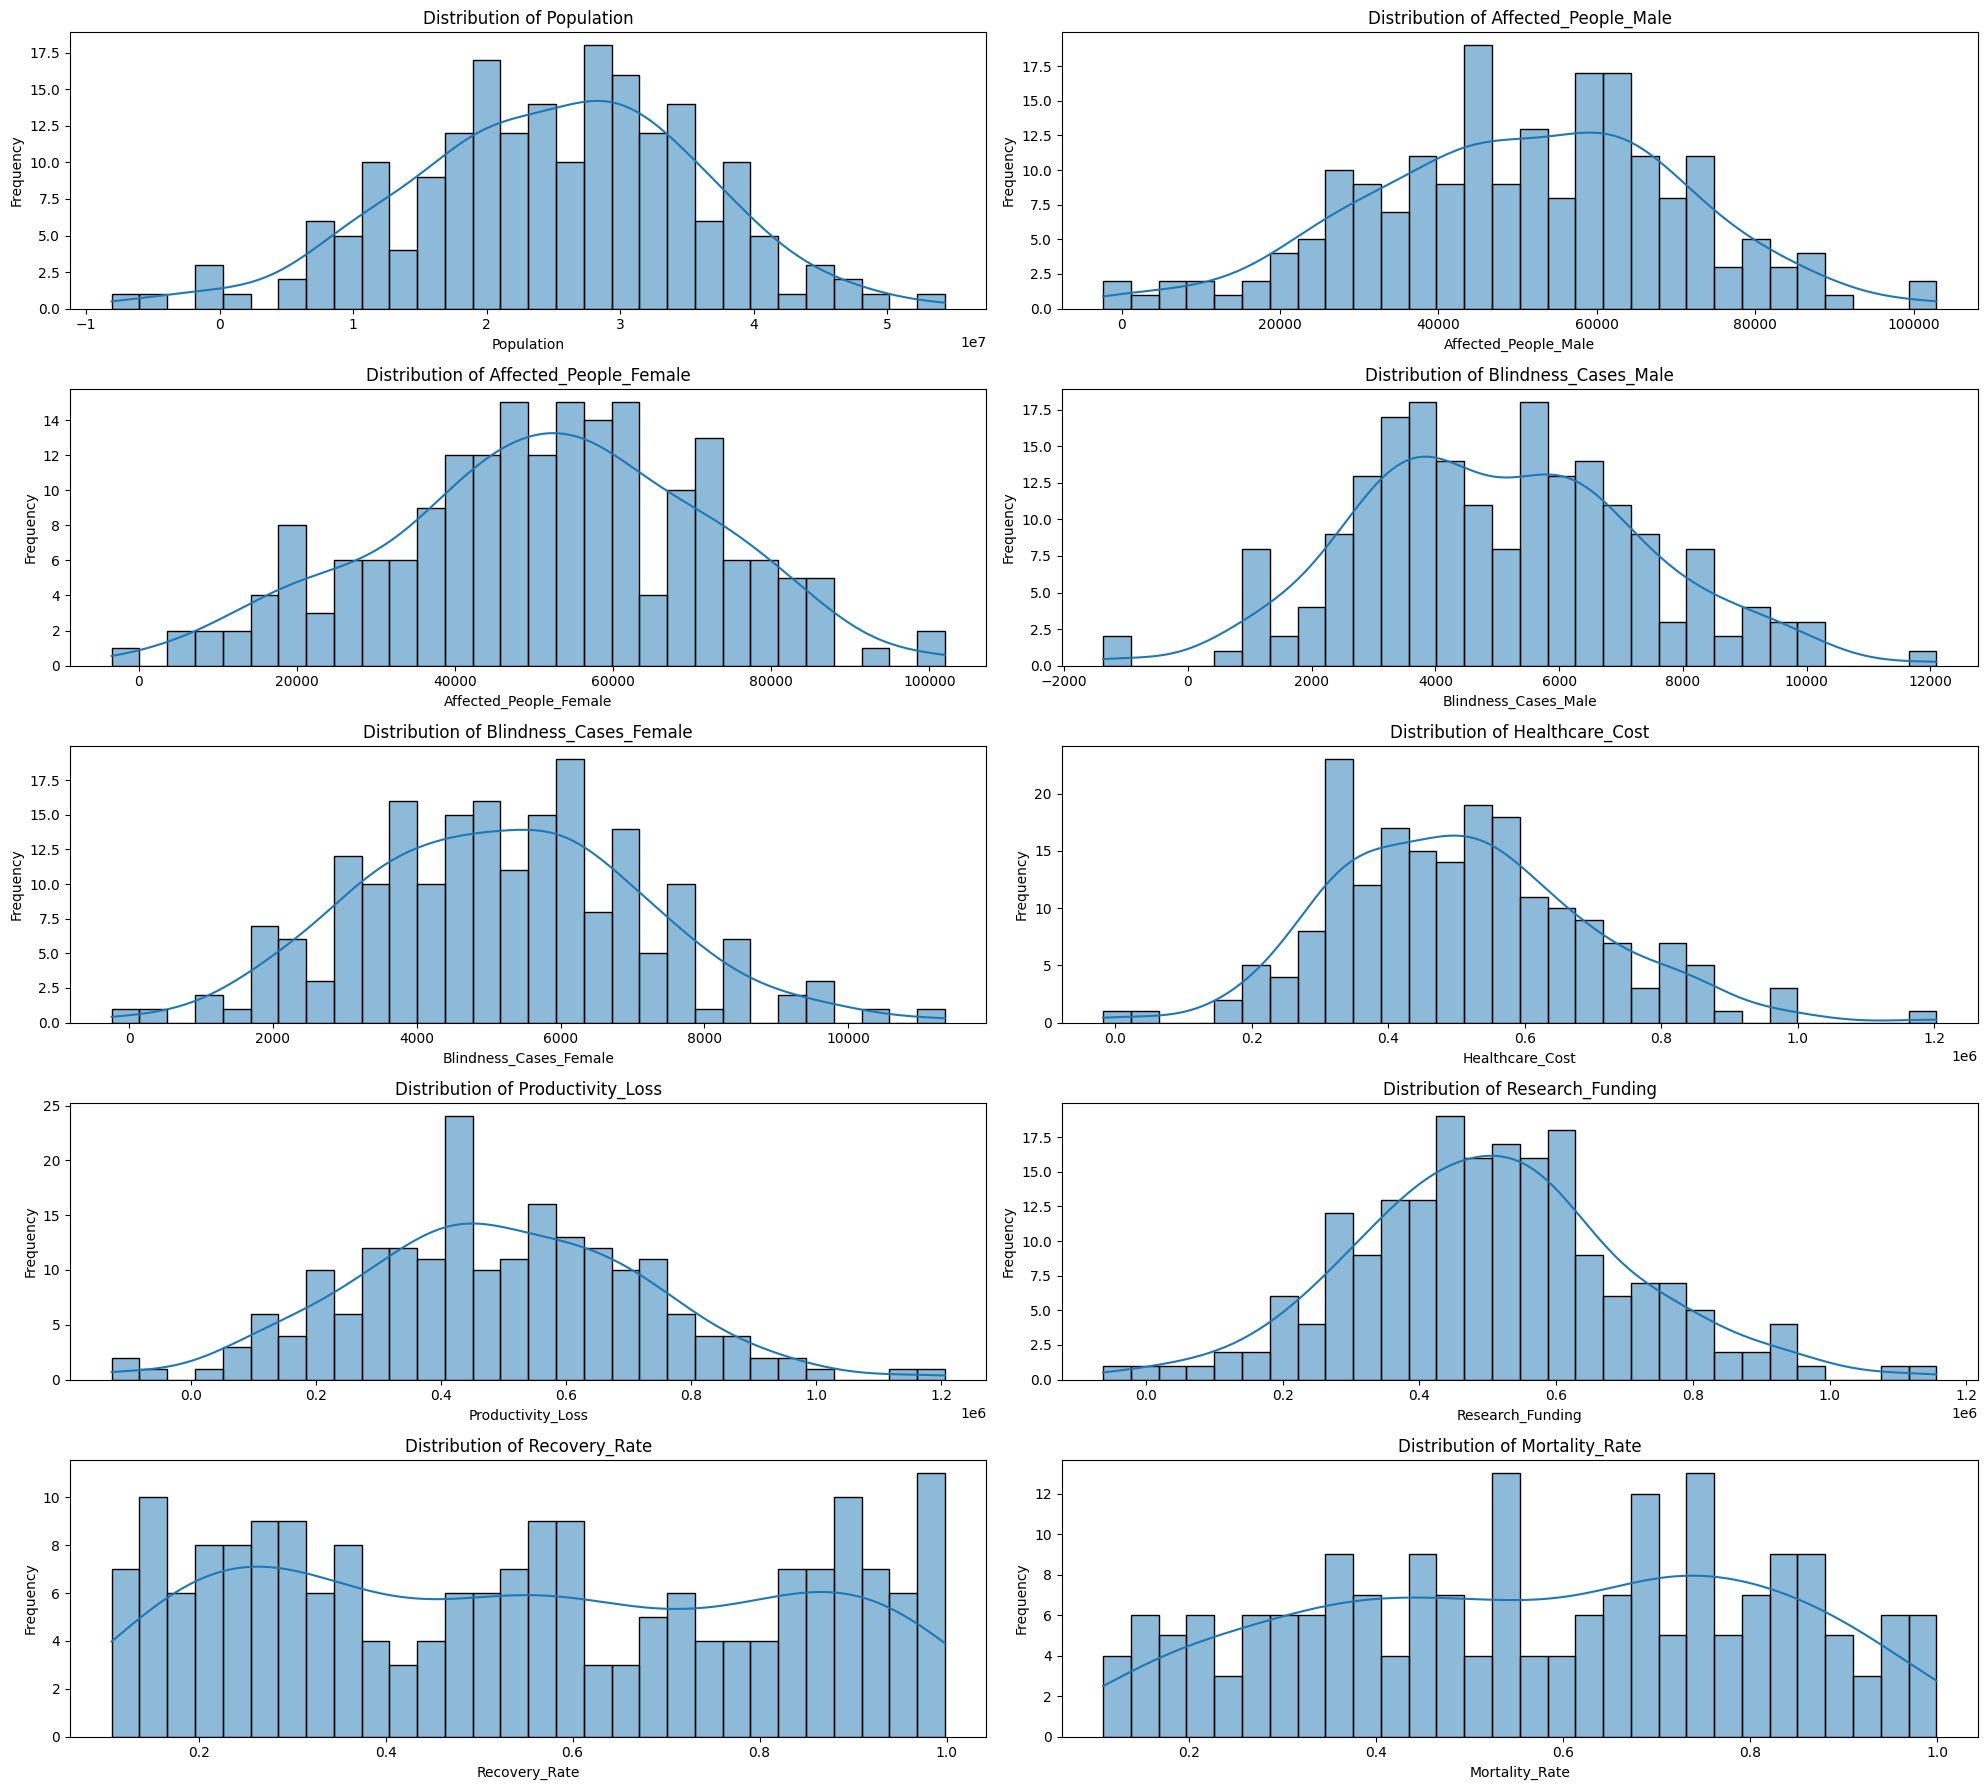

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(20, 18))

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()
